# Categorical Predictors (ANOVA family)

All model classes make it easy to work with categorical predictors, commonly known as **factors**. The basic methods have similar semantics to transforming variables as seen in the [previous tutorial](01_lm.ipynb)

| Method | Description |
|--------|-------------|
| [`.anova()`](../api/models/lm.md#pymer4.models.base.model.anova) | Calculate a Type-III ANOVA table using `joint_tests()` in R |
| [`.summary_anova()`](../api/models/lm.md#pymer4.models.base.model.summary_anova) | Get a nicely formatted table containing `.result_anova` |
| [`.emmeans()`](../api/models/lm.md#pymer4.models.base.model.emmeans) | Compute marginal means/contrasts at specific factor levels |
| [`.set_factors()`](../api/models/lm.md#pymer4.models.base.model.set_factors) | Set a variable as a factor with alphabetaically sorted levels by default, or specify the exact level ordering; this changes the data-type to categorical/enum |
| [`.unset_factors()`](../api/models/lm.md#pymer4.models.base.model.unset_factors) | Unset all factor variables to their original datatype |
| [`.show_factors()`](../api/models/lm.md#pymer4.models.base.model.show_factors) | Show any set factors |
| [`.set_contrasts()`](../api/models/lm.md#pymer4.models.base.model.set_contrasts) | Encode factor levels using one of the supported coding schemes (`contr.treatment` by default) or a custom one using numeric codes that sum-to-zero |
| [`.show_contrasts()`](../api/models/lm.md#pymer4.models.base.model.show_contrasts) | Show any set contrasts |

In [1]:
from pymer4.models import lm
from pymer4 import load_dataset
import seaborn as sns
import numpy as np
import polars as pl
from polars import col

df = load_dataset("credit")

## 2-levels (t-test)

Let's start with a simple example using a categorical variable $Student$ with 2 levels and compare differences in $Balance$

$$ Balance \sim \beta_0 + \beta_1 * Student$$


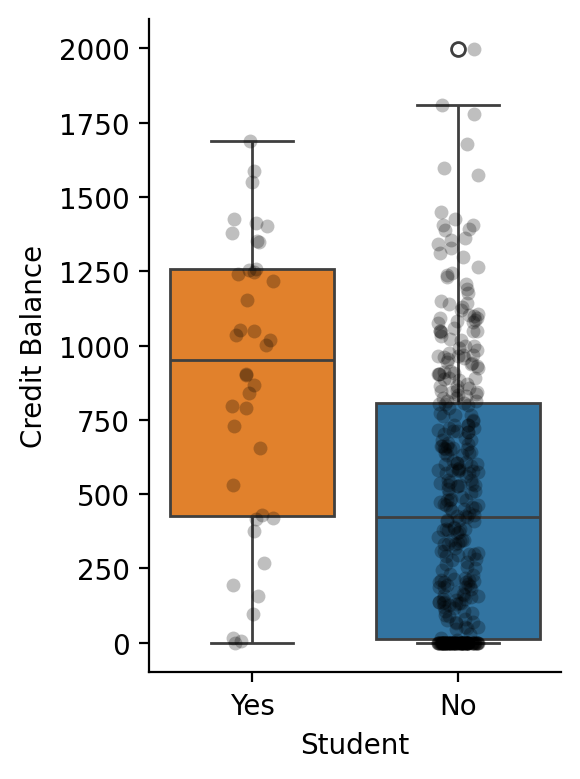

In [2]:
grid = sns.catplot(
    x="Student",
    y="Balance",
    kind="box",
    hue="Student",
    order=["Yes", "No"],
    aspect=0.75,
    height=4,
    data=df.to_pandas(),
)
grid.map(
    sns.stripplot, "Student", "Balance", color="black", alpha=0.25, order=["Yes", "No"]
).set_ylabels('Credit Balance');

After creating the model, we can use `.set_factors()` treat $Student$ as a categorical variable. It's levels will be alphabetical by default

In [3]:
model = lm('Balance ~ Student', data=df)

model.set_factors('Student')

model.show_factors()

{'Student': ['No', 'Yes']}


Categorical variables use the a "dummy" or *treatment* coding-scheme by default

In [4]:
model.show_contrasts()

{'Student': 'contr.treatment'}


This means that our parameter estimate $\beta_1$ will reflect $Student_{Yes} - Student_{No}$

In [5]:
model.fit(summary=True)

GT(_tbl_data=shape: (2, 9)
┌─────────────┬────────────┬────────────┬────────────┬───┬───────────┬─────┬─────────┬───────┐
│ term        ┆ estimate   ┆ conf_low   ┆ conf_high  ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64       ┆ i32 ┆ str     ┆ str   │
╞═════════════╪════════════╪════════════╪════════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 480.369444 ┆ 434.299848 ┆ 526.439041 ┆ … ┆ 20.498956 ┆ 398 ┆ <.001   ┆ ***   │
│ StudentYes  ┆ 396.455556 ┆ 250.770699 ┆ 542.140412 ┆ … ┆ 5.349964  ┆ 398 ┆ <.001   ┆ ***   │
└─────────────┴────────────┴────────────┴────────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x3176b6ab0>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x168f0d190>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(Balance~Student)', subtitle=Md(text='Number of observations: *400*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.0671*  \n            R-squared-adj: *0.0647*  \n            *F(1, 398) = 28.622, p = <.001*  \n            Log-likelihood: *-3005*  \n            AIC: *6016* | BIC: *6028*  \n            Residual error: *444.626*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x31772b500>, _formats=[<great_tables._gt_data.FormatInfo object at 0x31772bf20>, <great_tables._gt_data.FormatInfo object at 0x3170058e0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, 

The t-test on the $\beta_1$ is equivalent to a two-sample t-test:

In [7]:
# compare to scipy
from scipy.stats import ttest_ind

student = df.filter(col('Student') == 'Yes').select('Balance')
non_student = df.filter(col('Student') == 'No').select('Balance')

results = ttest_ind(student, non_student)
print(f"Scipy T-test:\ndiff = {student.mean().item() - non_student.mean().item():.3f} t= {results.statistic[0]:.2f} p = {results.pvalue[0]:.3f}")

Scipy T-test:
diff = 396.456 t= 5.35 p = 0.000


## 3-levels (one-way ANOVA)

With more than 2 levels of a factor you may want to calculate an F-table, i.e. an ANOVA

In [8]:
penguins = load_dataset('penguins')

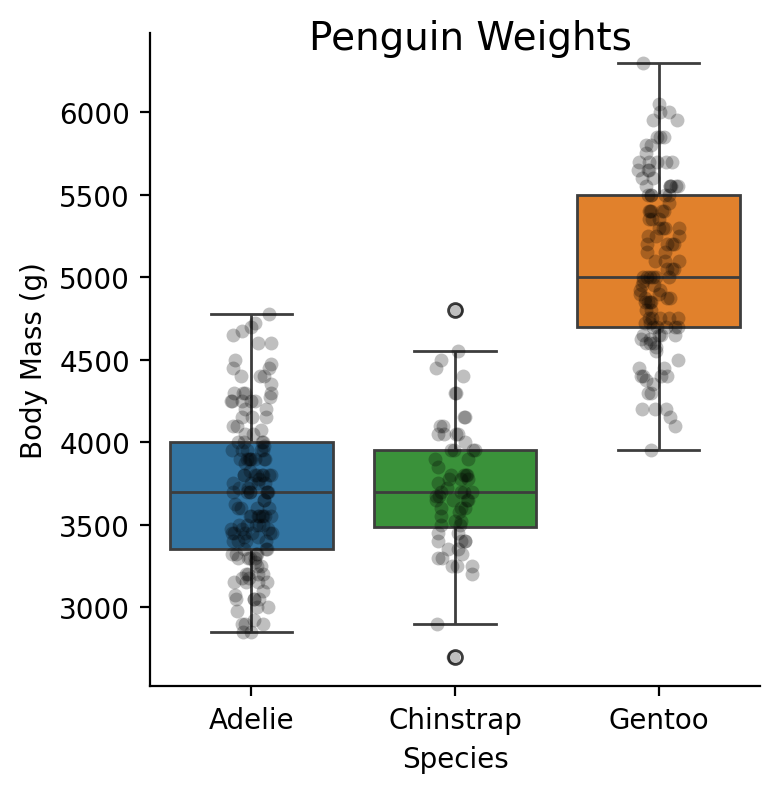

In [9]:
grid = sns.catplot(
    x="species",
    y="body_mass_g",
    kind="box",
    hue="species",
    order=["Adelie", "Chinstrap", "Gentoo"],
    aspect=1,
    height=4,
    data=penguins.to_pandas(),
)
grid.map(
    sns.stripplot,
    "species",
    "body_mass_g",
    color="black",
    alpha=0.25,
    order=["Adelie", "Chinstrap", "Gentoo"],
).set_axis_labels("Species", "Body Mass (g)").figure.suptitle("Penguin Weights", x=.6, fontsize=14);

Let's say we're interested in the overall difference across $Species$, i.e. an F-test or "main effect" but we'd also like to parameterize the regression so the default treatment coding scheme compares Gentoo vs Adelie and Gentoo vs Chinstrap.

This is easy to do by setting up factors with the levels in the desired order:


In [10]:
model = lm('body_mass_g ~ species', data=penguins)
model.set_factors({'species': ['Gentoo', 'Adelie','Chinstrap']})

And can easily perform an F-test with `.anova()`

In [11]:
model.anova(summary=True)

GT(_tbl_data=shape: (1, 6)
┌────────────┬─────┬───────┬─────────┬─────────┬───────┐
│ model term ┆ df1 ┆ df2   ┆ F_ratio ┆ p_value ┆ stars │
│ ---        ┆ --- ┆ ---   ┆ ---     ┆ ---     ┆ ---   │
│ str        ┆ f64 ┆ f64   ┆ f64     ┆ str     ┆ str   │
╞════════════╪═════╪═══════╪═════════╪═════════╪═══════╡
│ species    ┆ 2.0 ┆ 339.0 ┆ 343.626 ┆ <.001   ┆ ***   │
└────────────┴─────┴───────┴─────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x322665a60>, _boxhead=Boxhead([ColInfo(var='model term', type=<ColInfoTypeEnum.default: 1>, column_label='model term', column_align='left', column_width=None), ColInfo(var='df1', type=<ColInfoTypeEnum.default: 1>, column_label='df1', column_align='right', column_width=None), ColInfo(var='df2', type=<ColInfoTypeEnum.default: 1>, column_label='df2', column_align='right', column_width=None), ColInfo(var='F_ratio', type=<ColInfoTypeEnum.default: 1>, column_label='F_ratio', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p_value', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x323dd20f0>, _spanners=Spanners([]), _heading=Heading(title='ANOVA (Type III tests)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x323e51460>, _formats=[<great_tables._gt_data.FormatInfo object at 0x323dd1070>, <great_tables._gt_data.FormatInfo object at 0x323e514c0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInf

Using `.anova()` is the most convenient way to get omnibus tests on categorical variables (i.e. *main effects*), as it will completely ignore any contrasts you have set and use the appropriate ones in the face of both balanced and unbalanced group designs (i.e. orthogonal type-III SS)

This make it easy to inspect a summary of the hypothesis tests setup by your parameterization, without worrying about ANOVA "coding-schemes"

:::{note}
*We use the `joint_tests()` functionality from [emmeans](https://www.rdocumentation.org/packages/emmeans/versions/1.3.5.1/topics/joint_tests) to generate the ANOVA table.*
:::

In [12]:
# Unchanged by ANOVA
model.show_contrasts()

{'species': 'contr.treatment'}


In [13]:
# Differences we setup by making Gentoo the default level
model.summary()

GT(_tbl_data=shape: (3, 9)
┌──────────────┬──────────────┬─────────────┬─────────────┬───┬────────────┬─────┬─────────┬───────┐
│ term         ┆ estimate     ┆ conf_low    ┆ conf_high   ┆ … ┆ t_stat     ┆ df  ┆ p_value ┆ stars │
│ ---          ┆ ---          ┆ ---         ┆ ---         ┆   ┆ ---        ┆ --- ┆ ---     ┆ ---   │
│ str          ┆ f64          ┆ f64         ┆ f64         ┆   ┆ f64        ┆ i32 ┆ str     ┆ str   │
╞══════════════╪══════════════╪═════════════╪═════════════╪═══╪════════════╪═════╪═════════╪═══════╡
│ (Intercept)  ┆ 5076.01626   ┆ 4994.028574 ┆ 5158.003946 ┆ … ┆ 121.779938 ┆ 339 ┆ <.001   ┆ ***   │
│ speciesAdeli ┆ -1375.354009 ┆ -1485.79630 ┆ -1264.91171 ┆ … ┆ -24.495169 ┆ 339 ┆ <.001   ┆ ***   │
│ e            ┆              ┆ 7           ┆             ┆   ┆            ┆     ┆         ┆       │
│ speciesChins ┆ -1342.928025 ┆ -1480.33565 ┆ -1205.52039 ┆ … ┆ -19.223978 ┆ 339 ┆ <.001   ┆ ***   │
│ trap         ┆              ┆ 7           ┆ 3           ┆   ┆            ┆     ┆         ┆       │
└──────────────┴──────────────┴─────────────┴─────────────┴───┴────────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x323dd1640>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x323e52420>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(body_mass_g~species)', subtitle=Md(text='Number of observations: *342*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.6697*  \n            R-squared-adj: *0.6677*  \n            *F(2, 339) = 343.626, p = <.001*  \n            Log-likelihood: *-2582*  \n            AIC: *5172* | BIC: *5188*  \n            Residual error: *462.274*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x323e52870>, _formats=[<great_tables._gt_data.FormatInfo object at 0x323e522a0>, <great_tables._gt_data.FormatInfo object at 0x323e526f0>], _substitutions=[], _options=Options(table_id=Option

### Marginal mean comparisons

You can compare marginal pairwise comparisons between the means of each level of species, which are ordered based on how we used `.set_factors()`

In [14]:
model.emmeans('species')

species,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""Gentoo""",5076.01626,41.681876,339.0,4975.996691,5176.035829
"""Adelie""",3700.662252,37.619354,339.0,3610.391084,3790.93342
"""Chinstrap""",3733.088235,56.059001,339.0,3598.569406,3867.607064


By using the `contrasts` argument, you can setup various comparisons of interest with multiple-comparisons correction. Using the `'pairwise'` will perform all possible pairwise comparisons, which can get unwieldly for factors with many levels and interactions. 

In this case we have only 1 predictor with 3 levels:

In [15]:
model.emmeans('species', contrasts='pairwise', p_adjust='sidak')

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""Gentoo - Adelie""",1375.354009,56.147971,339.0,1240.621689,1510.086328,24.495169,0.0
"""Gentoo - Chinstrap""",1342.928025,69.856928,339.0,1175.299777,1510.556273,19.223978,0.0
"""Adelie - Chinstrap""",-32.425984,67.511684,339.0,-194.426598,129.574631,-0.480302,0.949888


We can also can test a specific comparison using numeric codes in the same order as factor levels

In [16]:
model.emmeans('species', contrasts={'gentoo_vs_others': [1, -0.5, -0.5]})

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""gentoo_vs_others""",1359.141017,53.636141,339.0,1253.639453,1464.64258,25.340022,3.1630e-80


### Parameterized linear contrast

Alternatively, if we know that we primarily care about this contrast in advance, we can parameterize the model to test it directly. The default coding scheme compares each factor level to a specific reference level, in this case $Species_{Gentoo}$

In [17]:
model.show_factors()

{'species': ['Gentoo', 'Adelie', 'Chinstrap']}


In [18]:
# Dummy-coded by default
model.show_contrasts()

{'species': 'contr.treatment'}


But we can set a custom contrast so that our first model parameter reflects this particular comparison of interest.

Now $\beta_1$ reflects the same comparison between the marginal means we looked at earlier. Notice how the estimates and inferential statistics match:

In [19]:
# With auto-solve for other orthogonal contrasts
model.set_contrasts({'species': [1, -.5, -.5]})

model.fit(summary=True)

GT(_tbl_data=shape: (3, 9)
┌─────────────┬─────────────┬─────────────┬─────────────┬───┬────────────┬─────┬─────────┬───────┐
│ term        ┆ estimate    ┆ conf_low    ┆ conf_high   ┆ … ┆ t_stat     ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---         ┆ ---         ┆ ---         ┆   ┆ ---        ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64         ┆ f64         ┆ f64         ┆   ┆ f64        ┆ i32 ┆ str     ┆ str   │
╞═════════════╪═════════════╪═════════════╪═════════════╪═══╪════════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 4169.922249 ┆ 4117.900482 ┆ 4221.944016 ┆ … ┆ 157.668244 ┆ 339 ┆ <.001   ┆ ***   │
│ species1    ┆ 1359.141017 ┆ 1253.639453 ┆ 1464.64258  ┆ … ┆ 25.340022  ┆ 339 ┆ <.001   ┆ ***   │
│ species2    ┆ 22.928633   ┆ -70.971307  ┆ 116.828573  ┆ … ┆ 0.480302   ┆ 339 ┆ 0.6313  ┆       │
└─────────────┴─────────────┴─────────────┴─────────────┴───┴────────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x323e156d0>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x323e6b290>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(body_mass_g~species)', subtitle=Md(text='Number of observations: *342*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.6697*  \n            R-squared-adj: *0.6677*  \n            *F(2, 339) = 343.626, p = <.001*  \n            Log-likelihood: *-2582*  \n            AIC: *5172* | BIC: *5188*  \n            Residual error: *462.274*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x31772bc80>, _formats=[<great_tables._gt_data.FormatInfo object at 0x168f0db50>, <great_tables._gt_data.FormatInfo object at 0x168f0cb90>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='aut

## Multiple predictors (factorial ANOVA)

In [20]:
poker = load_dataset('poker')

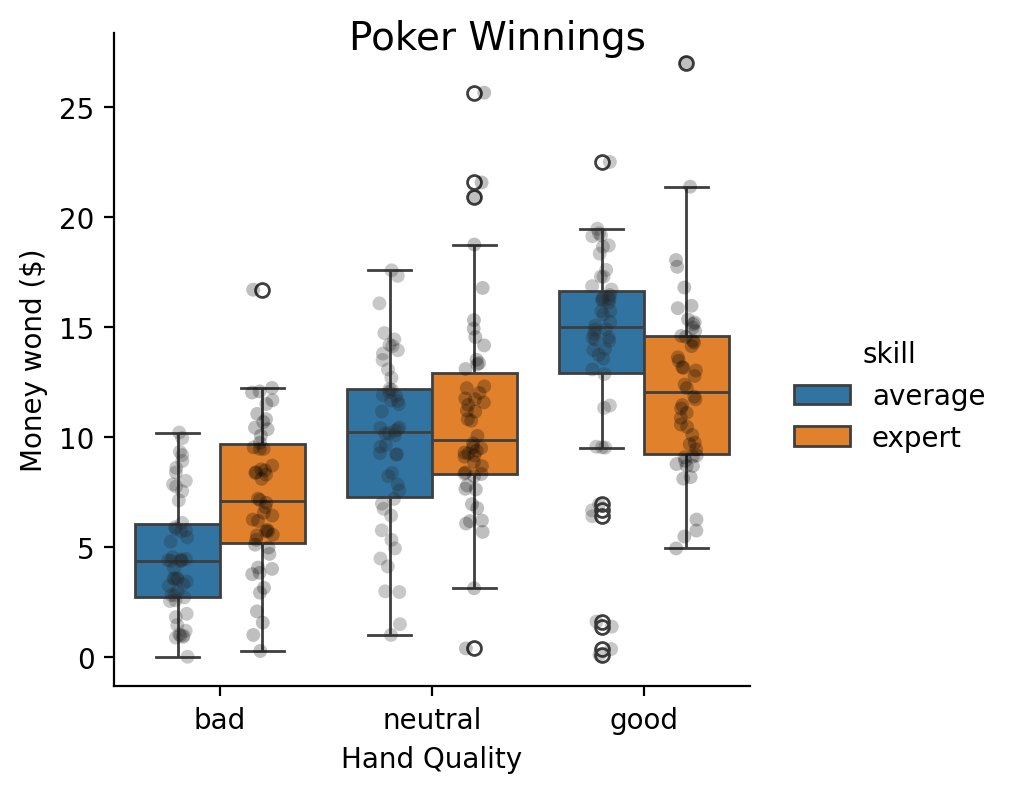

In [21]:
grid = sns.catplot(
    x="hand",
    y="balance",
    kind="box",
    hue="skill",
    order=["bad", "neutral", "good"],
    hue_order=['average', 'expert'],
    aspect=1,
    height=4,
    data=poker.to_pandas(),
)
grid.map_dataframe(
    sns.stripplot,
    "hand",
    "balance",
    hue='skill',
    palette='dark:black',
    dodge=True,
    alpha=0.25,
    order=["bad", "neutral", "good"],
    hue_order=['average', 'expert'],
).set_axis_labels("Hand Quality", "Money wond ($)").figure.suptitle("Poker Winnings", x=.5, fontsize=14);

Using `.anova()` will automatically set orthogonal contrast codes and calculated Type-III SS

In [22]:
model = lm('balance ~ hand * skill', data=poker)
model.set_factors({'hand': ['bad', 'neutral','good'], 'skill':['average', 'expert']})
model.anova(summary=True)

GT(_tbl_data=shape: (3, 6)
┌────────────┬─────┬───────┬─────────┬─────────┬───────┐
│ model term ┆ df1 ┆ df2   ┆ F_ratio ┆ p_value ┆ stars │
│ ---        ┆ --- ┆ ---   ┆ ---     ┆ ---     ┆ ---   │
│ str        ┆ f64 ┆ f64   ┆ f64     ┆ str     ┆ str   │
╞════════════╪═════╪═══════╪═════════╪═════════╪═══════╡
│ hand       ┆ 2.0 ┆ 294.0 ┆ 79.169  ┆ <.001   ┆ ***   │
│ skill      ┆ 1.0 ┆ 294.0 ┆ 2.434   ┆ 0.1198  ┆       │
│ hand:skill ┆ 2.0 ┆ 294.0 ┆ 7.083   ┆ <.001   ┆ ***   │
└────────────┴─────┴───────┴─────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x32f438ec0>, _boxhead=Boxhead([ColInfo(var='model term', type=<ColInfoTypeEnum.default: 1>, column_label='model term', column_align='left', column_width=None), ColInfo(var='df1', type=<ColInfoTypeEnum.default: 1>, column_label='df1', column_align='right', column_width=None), ColInfo(var='df2', type=<ColInfoTypeEnum.default: 1>, column_label='df2', column_align='right', column_width=None), ColInfo(var='F_ratio', type=<ColInfoTypeEnum.default: 1>, column_label='F_ratio', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p_value', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x32f457560>, _spanners=Spanners([]), _heading=Heading(title='ANOVA (Type III tests)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x32f3cef90>, _formats=[<great_tables._gt_data.FormatInfo object at 0x32f43b260>, <great_tables._gt_data.FormatInfo object at 0x32f475430>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom

### Main effect of skill

We can unpack the F-test results using comparison between *marginal means*.  
The F-test result tells are there's no main-effect of skill, which we can verify by calculating the difference or *contrast* between each level of `skill` while averaging over levels of `hand`.  

Notice the p-value is the same and that $F=t^2$

In [23]:
skill_contrast = [1, -1]
model.emmeans('skill', contrasts={'avg_vs_expert': skill_contrast})

R messages: 
NOTE: Results may be misleading due to involvement in interactions



contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""avg_vs_expert""",-0.724333,0.464243,294.0,-1.637994,0.189328,-1.560246,0.119778


We can verify the estimate matches what would have gotten had we calculated the marginal means ourselves:

In [24]:
average = model.data.filter(col('skill') == 'average').select('balance')
expert = model.data.filter(col('skill') == 'expert').select('balance')
average.mean() - expert.mean()

balance
f64
-0.724333


### Main effect of hand

The F-test for `hand` indicates a main effect but it doesn't tell us why.  
In the figure above, it looks like there's an increasing *linear trend* as we go from bad -> neutral -> good.  

Let's test that, while averaging over levels of `skill`

In [25]:
# Specified in the order of the factor levels, which we set above
hand_contrast = [-1, 0, 1]
model.emmeans('hand', contrasts={'linear_trend':hand_contrast})


R messages: 
NOTE: Results may be misleading due to involvement in interactions



contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""linear_trend""",7.0849,0.568579,294.0,5.965899,8.203901,12.460706,6.6673e-29


We can again verify this estimate matches what we would have gotten through manual calculation:

In [26]:
bad = model.data.filter(col("hand") == "bad").select("balance").mean().item()
neutral = model.data.filter(col("hand") == "neutral").select("balance").mean().item()
good = model.data.filter(col("hand") == "good").select("balance").mean().item()

np.dot([bad, neutral, good], hand_contrast)

np.float64(7.084900000000006)

### Moderated by skill

The F-test on the interaction tells us that this trend is going to vary depending upon which level of `skill` we look at.  
We can use `by` to subset out contrast for each level of `skill` to see how they differ

In [27]:
model.emmeans("hand", by="skill", contrasts={"linear_trend": hand_contrast})

contrast,skill,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
cat,cat,f64,f64,f64,f64,f64,f64,f64
"""linear_trend""","""average""",9.211,0.804093,294.0,7.628493,10.793507,11.455148,2.2922e-25
"""linear_trend""","""expert""",4.9588,0.804093,294.0,3.376293,6.541307,6.166951,2.2960e-9


It does look like the trend is steeper for *average* players vs *expert* players. Let's test that specific interaction by using `interaction`.  

In [28]:
# interaction sets contrasts for the by variable
model.emmeans(
    "hand",
    by="skill",
    contrasts={"linear_trend": hand_contrast},
    interaction={"avg_vs_expert": skill_contrast},
)


contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""avg_vs_expert""",4.2522,1.137159,294.0,2.014197,6.490203,3.73932,0.000222


Since `skill` only have 2 levels, we could have used pairwise instead:

In [29]:
model.emmeans(
    "hand",
    by="skill",
    contrasts={"linear_trend": hand_contrast},
    interaction="pairwise",
)


contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""linear_trend average - linear_…",4.2522,1.137159,294.0,2.014197,6.490203,3.73932,0.000222


This is a little more work to calculate manually but matches our estimate:

In [30]:
bad_a = (
    model.data.filter(col("hand") == "bad", col("skill") == "average")
    .select("balance")
    .mean()
    .item()
)
neutral_a = (
    model.data.filter(col("hand") == "neutral", col("skill") == "average")
    .select("balance")
    .mean()
    .item()
)
good_a = (
    model.data.filter(col("hand") == "good", col("skill") == "average")
    .select("balance")
    .mean()
    .item()
)
bad_e = (
    model.data.filter(col("hand") == "bad", col("skill") == "expert")
    .select("balance")
    .mean()
    .item()
)
neutral_e = (
    model.data.filter(col("hand") == "neutral", col("skill") == "expert")
    .select("balance")
    .mean()
    .item()
)
good_e = (
    model.data.filter(col("hand") == "good", col("skill") == "expert")
    .select("balance")
    .mean()
    .item()
)

In [31]:
# Toggle code above to see calculations
np.dot([bad_a, neutral_a, good_a], hand_contrast) - np.dot(
    [bad_e, neutral_e, good_e], hand_contrast
)

np.float64(4.252199999999995)

### Planned contrasts
Alternatively, we can parameterize our regression model such that our coefficients reflect the comparisons we want. Using `.anova()` will automatically set the correct contrasts to compute valid F-tests, but using `.fit()` allows us get estimates for the $k-1$ parameters for each $k$ level categorical predictor.


In [32]:
model.show_factors()

{'hand': ['bad', 'neutral', 'good'], 'skill': ['average', 'expert']}



By default these are *treatment* (dummy) coded which is the default in R as well. But we can change this to capture the *specific* comparisons we care about and the model will automatically solve for remaining orthogonal parameters

In [33]:
model.show_contrasts()

{'hand': 'contr.treatment', 'skill': 'contr.treatment'}


In [34]:
# linear contrast across levels of hand 
# average - expert for skill
model.set_contrasts({'hand': hand_contrast, 'skill': skill_contrast})
model.show_contrasts()

{'hand': array([-1,  0,  1]), 'skill': array([ 1, -1])}


Now the estimates capture what we care about.   
Since `hand` has 3 levels, we need 2 parameters to fully capture it
- *hand1* = linear contrast (bad < neutral < good) averaged over skill 
- *hand2* = automatically computed quadratic contrast averaged over skill

Since `skill` had 2 levels, we just need 1 parameter to capture it
- *skill1* = average - expert difference averaged over hand

The first interaction parameter reflect linear trend difference we calculated above:
- *hand1:skill1* = linear contrast average skill - linear contrast expert skill
- *hand2:skill1* = automatically computed quadratic contrast average skill - quadratic contrast expert skill

In [35]:
model.fit(summary=True)

GT(_tbl_data=shape: (6, 9)
┌──────────────┬───────────┬───────────┬───────────┬───┬───────────┬─────┬─────────┬───────┐
│ term         ┆ estimate  ┆ conf_low  ┆ conf_high ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---          ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str          ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i32 ┆ str     ┆ str   │
╞══════════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept)  ┆ 9.7715    ┆ 9.31467   ┆ 10.22833  ┆ … ┆ 42.096481 ┆ 294 ┆ <.001   ┆ ***   │
│ hand1        ┆ 7.0849    ┆ 5.965899  ┆ 8.203901  ┆ … ┆ 12.460706 ┆ 294 ┆ <.001   ┆ ***   │
│ hand2        ┆ -0.704351 ┆ -1.495604 ┆ 0.086903  ┆ … ┆ -1.751915 ┆ 294 ┆ 0.08083 ┆ .     │
│ skill1       ┆ -0.724333 ┆ -1.637994 ┆ 0.189328  ┆ … ┆ -1.560246 ┆ 294 ┆ 0.1198  ┆       │
│ hand1:skill1 ┆ 4.2522    ┆ 2.014197  ┆ 6.490203  ┆ … ┆ 3.73932   ┆ 294 ┆ <.001   ┆ ***   │
│ hand2:skill1 ┆ 0.34448   ┆ -1.238027 ┆ 1.926987  ┆ … ┆ 0.428408  ┆ 294 ┆ 0.6687  ┆       │
└──────────────┴───────────┴───────────┴───────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x32f455d60>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x32f4881d0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(balance~hand*skill)', subtitle=Md(text='Number of observations: *300*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.3731*  \n            R-squared-adj: *0.3624*  \n            *F(5, 294) = 34.988, p = <.001*  \n            Log-likelihood: *-840*  \n            AIC: *1694* | BIC: *1720*  \n            Residual error: *4.02*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=Non

### All pairwise comparisons

Though not encouraged, we can also calculate the pairwise comparisons between every combination of `hand` and `skill`

In [36]:
model.emmeans(['hand', 'skill'], contrasts='pairwise', p_adjust='bonferroni')

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""bad average - neutral average""",-5.2572,0.804093,294.0,-7.636816,-2.877584,-6.538053,4.1276e-9
"""bad average - good average""",-9.211,0.804093,294.0,-11.590616,-6.831384,-11.455148,3.4383e-24
"""bad average - bad expert""",-2.7098,0.804093,294.0,-5.089416,-0.330184,-3.37001,0.012781
"""bad average - neutral expert""",-6.2628,0.804093,294.0,-8.642416,-3.883184,-7.788655,1.7546e-12
"""bad average - good expert""",-7.6686,0.804093,294.0,-10.048216,-5.288984,-9.536961,8.7939e-18
…,…,…,…,…,…,…,…
"""good average - neutral expert""",2.9482,0.804093,294.0,0.568584,5.327816,3.666493,0.004376
"""good average - good expert""",1.5424,0.804093,294.0,-0.837216,3.922016,1.918187,0.840836
"""bad expert - neutral expert""",-3.553,0.804093,294.0,-5.932616,-1.173384,-4.418645,0.00021


## With continuous predictor(s) (e.g. ANCOVA/moderation)

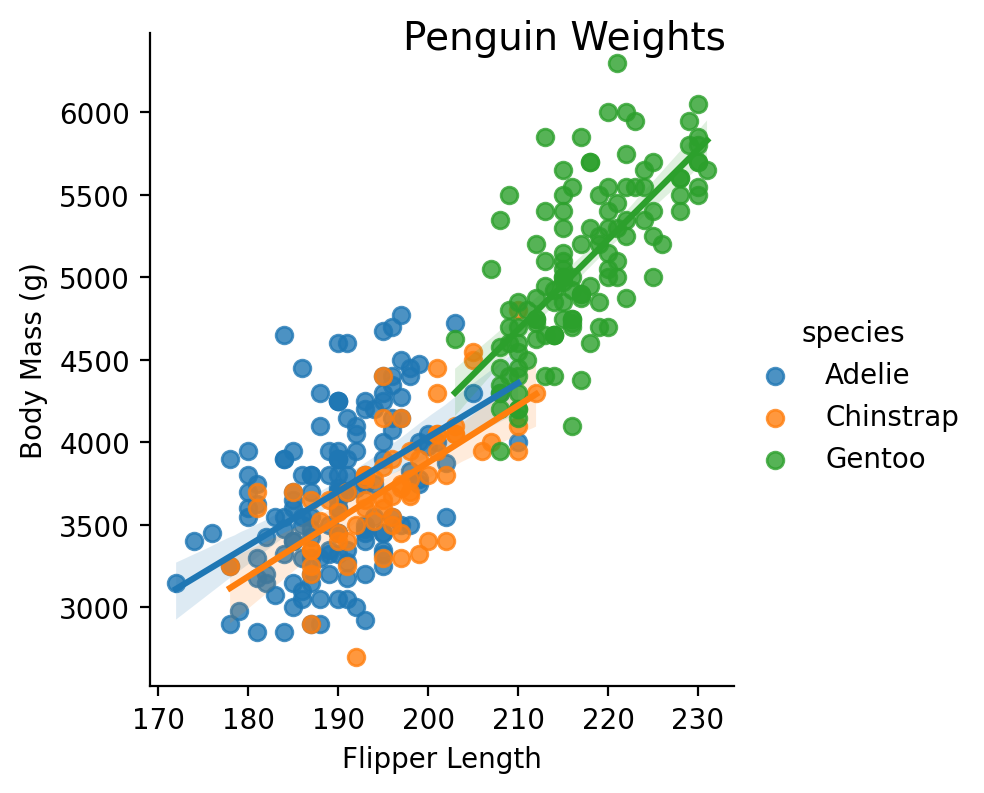

In [37]:
grid = sns.lmplot(
    x="flipper_length_mm",
    y="body_mass_g",
    hue="species",
    hue_order=["Adelie", "Chinstrap", "Gentoo"],
    aspect=1,
    height=4,
    data=penguins.to_pandas(),
)
grid.set_axis_labels("Flipper Length", "Body Mass (g)").figure.suptitle("Penguin Weights", x=.6, fontsize=14);

In [52]:
model = lm('body_mass_g ~ species * flipper_length_mm', data=penguins)
model.set_factors('species')
model.set_contrasts({'species':'contr.sum'})
model.set_transforms('flipper_length_mm', transform='center')
model.anova(summary=True)

GT(_tbl_data=shape: (3, 6)
┌───────────────────────────┬─────┬───────┬─────────┬──────────┬───────┐
│ model term                ┆ df1 ┆ df2   ┆ F_ratio ┆ p_value  ┆ stars │
│ ---                       ┆ --- ┆ ---   ┆ ---     ┆ ---      ┆ ---   │
│ str                       ┆ f64 ┆ f64   ┆ f64     ┆ str      ┆ str   │
╞═══════════════════════════╪═════╪═══════╪═════════╪══════════╪═══════╡
│ species                   ┆ 2.0 ┆ 336.0 ┆ 3.934   ┆ 0.02047  ┆ *     │
│ flipper_length_mm         ┆ 1.0 ┆ 336.0 ┆ 168.292 ┆ <.001    ┆ ***   │
│ species:flipper_length_mm ┆ 2.0 ┆ 336.0 ┆ 5.532   ┆ 0.004327 ┆ **    │
└───────────────────────────┴─────┴───────┴─────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x32f74d490>, _boxhead=Boxhead([ColInfo(var='model term', type=<ColInfoTypeEnum.default: 1>, column_label='model term', column_align='left', column_width=None), ColInfo(var='df1', type=<ColInfoTypeEnum.default: 1>, column_label='df1', column_align='right', column_width=None), ColInfo(var='df2', type=<ColInfoTypeEnum.default: 1>, column_label='df2', column_align='right', column_width=None), ColInfo(var='F_ratio', type=<ColInfoTypeEnum.default: 1>, column_label='F_ratio', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p_value', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x32f74fc20>, _spanners=Spanners([]), _heading=Heading(title='ANOVA (Type III tests)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x32f61dfa0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x32f74e840>, <great_tables._gt_data.FormatInfo object at 0x3300af800>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='

Let's try to interpet these parameters

In [40]:
model.fit(summary=True)

GT(_tbl_data=shape: (6, 9)
┌──────────────┬─────────────┬─────────────┬─────────────┬───┬────────────┬─────┬──────────┬───────┐
│ term         ┆ estimate    ┆ conf_low    ┆ conf_high   ┆ … ┆ t_stat     ┆ df  ┆ p_value  ┆ stars │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆   ┆ ---        ┆ --- ┆ ---      ┆ ---   │
│ str          ┆ f64         ┆ f64         ┆ f64         ┆   ┆ f64        ┆ i32 ┆ str      ┆ str   │
╞══════════════╪═════════════╪═════════════╪═════════════╪═══╪════════════╪═════╪══════════╪═══════╡
│ (Intercept)  ┆ 4052.294709 ┆ 3972.659451 ┆ 4131.929967 ┆ … ┆ 100.094657 ┆ 336 ┆ <.001    ┆ ***   │
│ species1     ┆ 8.254155    ┆ -95.827426  ┆ 112.335736  ┆ … ┆ 0.155996   ┆ 336 ┆ 0.8761   ┆       │
│ species2     ┆ -143.169979 ┆ -244.631097 ┆ -41.708862  ┆ … ┆ -2.775668  ┆ 336 ┆ 0.005817 ┆ **    │
│ flipper_leng ┆ 40.675862   ┆ 34.508204   ┆ 46.84352    ┆ … ┆ 12.972741  ┆ 336 ┆ <.001    ┆ ***   │
│ th_mm        ┆             ┆             ┆             ┆   ┆            ┆     ┆          ┆       │
│ species1:fli ┆ -7.844172   ┆ -15.946941  ┆ 0.258597    ┆ … ┆ -1.904272  ┆ 336 ┆ 0.05773  ┆ .     │
│ pper_length_ ┆             ┆             ┆             ┆   ┆            ┆     ┆          ┆       │
│ mm           ┆             ┆             ┆             ┆   ┆            ┆     ┆          ┆       │
│ species2:fli ┆ -6.102468   ┆ -15.590334  ┆ 3.385398    ┆ … ┆ -1.26518   ┆ 336 ┆ 0.2067   ┆       │
│ pper_length_ ┆             ┆             ┆             ┆   ┆            ┆     ┆          ┆       │
│ mm           ┆             ┆             ┆             ┆   ┆            ┆     ┆          ┆       │
└──────────────┴─────────────┴─────────────┴─────────────┴───┴────────────┴─────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x32f5f2630>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x32f732870>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(body_mass_g~species*flipper_length_mm)', subtitle=Md(text='Number of observations: *342*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.7896*  \n            R-squared-adj: *0.7864*  \n            *F(5, 336) = 252.156, p = <.001*  \n            Log-likelihood: *-2505*  \n            AIC: *5024* | BIC: *5051*  \n            Residual error: *370.599*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, al

The slope of `flipper_length_mm` averaged over `species`

In [41]:
model.emmeans('flipper_length_mm')

R messages: 
NOTE: Results may be misleading due to involvement in interactions



flipper_length_mm_trend,SE,df,lower_CL,upper_CL
f64,f64,f64,f64,f64
40.675862,3.135487,336.0,34.508204,46.84352


We can look at means for each species, when `flipper_length_mm` is held at its mean.

In [42]:
model.emmeans('species')

R messages: 
NOTE: Results may be misleading due to involvement in interactions



species,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""Adelie""",4060.548864,59.010136,336.0,3918.942235,4202.155493
"""Chinstrap""",3909.12473,55.358704,336.0,3776.280441,4041.969018
"""Gentoo""",4187.210534,90.577381,336.0,3969.851981,4404.569086


In [45]:
# Same thing
model.emmeans('species', at={'flipper_length_mm': model.data['flipper_length_mm'].mean()})

R messages: 
NOTE: Results may be misleading due to involvement in interactions



species,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""Adelie""",4060.548864,59.010136,336.0,3918.942235,4202.155493
"""Chinstrap""",3909.12473,55.358704,336.0,3776.280441,4041.969018
"""Gentoo""",4187.210534,90.577381,336.0,3969.851981,4404.569086


Sum (deviation) coding represents factor levels as a differences from the *grand-mean*, when `flipper_length_mm` is held at its mean.

In [46]:
species_means = model.emmeans('species').select('emmean')
grand_mean = species_means.mean().item()
adelie_mean = species_means[0]

adelie_mean - grand_mean

R messages: 
NOTE: Results may be misleading due to involvement in interactions



emmean
f64
8.254155


In [47]:
model.emmeans('flipper_length_mm', by='species')

species,flipper_length_mm_trend,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""Adelie""",32.83169,4.627184,336.0,21.727836,43.935543
"""Chinstrap""",34.573394,6.348364,336.0,19.339225,49.807563
"""Gentoo""",54.622502,5.173874,336.0,42.206757,67.038247


A trickier hypothesis: that relationship between flipper_length and weight gets *stronger* across species: Adelie < Chinstrap < Gentoo

In [48]:
model.emmeans("flipper_length_mm", by="species", contrasts={"linear": [-1, 0, 1]})

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""linear""",21.790812,6.941167,336.0,8.137194,35.44443,3.139359,0.001843


But it's really that Gentoo has the strongest relationship:

In [49]:
model.emmeans("flipper_length_mm", by="species", contrasts="pairwise")

contrast,estimate,SE,df,lower_CL,upper_CL,t_ratio,p_value
str,f64,f64,f64,f64,f64,f64,f64
"""Adelie - Chinstrap""",-1.741704,7.855734,336.0,-20.593109,17.109701,-0.221711,0.994611
"""Adelie - Gentoo""",-21.790812,6.941167,336.0,-38.447531,-5.134093,-3.139359,0.00552
"""Chinstrap - Gentoo""",-20.049108,8.18967,336.0,-39.701859,-0.396357,-2.448097,0.043957


We can also calculate marginal means at arbitrary values of `flipper_length_mm`.  

Since we're working in mean-centered units, it might be easier to think about the original scale instead:

In [56]:
# Undo the mean-centering
model.unset_transforms()

# Refit the model
model.fit()

Let's compare compare mean weights between species when `flipper_length_mm` is 200mm.  
This among the longest for Adelie and Chinstrap, but among the smallest for Gentoo

In [57]:
# Now 200 = 200mm, the original scale of the data
model.emmeans('species', at={'flipper_length_mm': 200})

R messages: 
NOTE: Results may be misleading due to involvement in interactions



species,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""Adelie""",4030.501148,55.412452,336.0,3897.527881,4163.474415
"""Chinstrap""",3877.482998,52.179851,336.0,3752.267004,4002.698992
"""Gentoo""",4137.219764,94.994587,336.0,3909.261244,4365.178285


In [58]:
# Now 200 = 200mm, the original scale of the data
model.emmeans('species', at={'flipper_length_mm': 200})

R messages: 
NOTE: Results may be misleading due to involvement in interactions



species,emmean,SE,df,lower_CL,upper_CL
cat,f64,f64,f64,f64,f64
"""Adelie""",4030.501148,55.412452,336.0,3897.527881,4163.474415
"""Chinstrap""",3877.482998,52.179851,336.0,3752.267004,4002.698992
"""Gentoo""",4137.219764,94.994587,336.0,3909.261244,4365.178285
